In [1]:
import pandas as pd
import xarray as xr
import os

import numpy as np
import gsw
import warnings
import matplotlib.pyplot as plt
from erddapy import ERDDAP

import cmocean
from netCDF4 import Dataset
import matplotlib.dates as mdates

import geopy.distance
import gsw
import matplotlib.ticker as mticker

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
e = ERDDAP(server="https://gliders.ioos.us/erddap")
e.constraints = None
e.protocol = "tabledap"
e.dataset_id = "ce_320-20220720T1429"

opendap_url = e.get_download_url(
    response="opendap",
)

print(opendap_url)

https://gliders.ioos.us/erddap/tabledap/ce_320-20220720T1429


In [3]:
e.response = "nc"
#e.variables = ["longitude","depth","latitude","backscatter", "temperature", "salinity","time","dissolved_oxygen","chlorophyll"]

df = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
)

df.head()

,trajectory,wmo_id,profile_id,latitude (degrees_north),longitude (degrees_east),depth (m),backscatter (m-1),CDOM (ppb),chlorophyll (ug l-1),conductivity (S m-1),...,source_file,temperature (Celsius),temperature_qc,time_qc,time_uv (UTC),time_uv_qc,u (m s-1),u_qc,v (m s-1),v_qc
time (UTC),,,,,,,,,,,,,,,,,,,,,
2022-07-20 14:52:47+00:00,ce_320-20220720T1429,4801966,1658328458,47.710639,-124.752967,4.779631,0.012584,1.4025,16.408,3.72057,...,ce_320-2022-200-4-0-sbd(01000000),13.0746,NaN,NaN,2022-07-20T14:55:27Z,NaN,0.145529,NaN,-0.299033,NaN
2022-07-20 14:52:47+00:00,ce_320-20220720T1429,4801966,1658328458,47.710639,-124.752967,8.478314,0.011264,1.4025,13.650,3.65212,...,ce_320-2022-200-4-0-sbd(01000000),12.1219,NaN,NaN,2022-07-20T14:55:27Z,NaN,0.145529,NaN,-0.299033,NaN
2022-07-20 14:52:47+00:00,ce_320-20220720T1429,4801966,1658328458,47.710639,-124.752967,12.404993,0.008995,1.1220,9.058,3.58958,...,ce_320-2022-200-4-0-sbd(01000000),11.1374,NaN,NaN,2022-07-20T14:55:27Z,NaN,0.145529,NaN,-0.299033,NaN
2022-07-20 14:52:47+00:00,ce_320-20220720T1429,4801966,1658328458,47.710639,-124.752967,16.321680,0.004533,0.9350,2.534,3.52775,...,ce_320-2022-200-4-0-sbd(01000000),10.2515,NaN,NaN,2022-07-20T14:55:27Z,NaN,0.145529,NaN,-0.299033,NaN
2022-07-20 14:52:47+00:00,ce_320-20220720T1429,4801966,1658328458,47.710639,-124.752967,19.881340,0.003065,0.9350,1.407,3.48344,...,ce_320-2022-200-4-0-sbd(01000000),9.5780,NaN,NaN,2022-07-20T14:55:27Z,NaN,0.145529,NaN,-0.299033,NaN


In [4]:
start = '2022-08-03 20:05:54+00:00'
end = '2022-08-07 11:41:59+00:00'
df = df.loc[start:end,:]
df.head(3)

,trajectory,wmo_id,profile_id,latitude (degrees_north),longitude (degrees_east),depth (m),backscatter (m-1),CDOM (ppb),chlorophyll (ug l-1),conductivity (S m-1),...,source_file,temperature (Celsius),temperature_qc,time_qc,time_uv (UTC),time_uv_qc,u (m s-1),u_qc,v (m s-1),v_qc
time (UTC),,,,,,,,,,,,,,,,,,,,,
2022-08-03 20:05:54+00:00,ce_320-20220720T1429,4801966,1659556306,46.859804,-124.959746,6.317120,0.005986,0.9350,1.862,3.95913,...,ce_320-2022-200-5-231-sbd(01010231),15.8868,NaN,NaN,2022-08-03T19:57:18Z,NaN,-0.064656,NaN,0.125838,NaN
2022-08-03 20:05:54+00:00,ce_320-20220720T1429,4801966,1659556306,46.859804,-124.959746,9.341731,0.005497,1.2155,2.051,3.95262,...,ce_320-2022-200-5-231-sbd(01010231),15.7658,NaN,NaN,2022-08-03T19:57:18Z,NaN,-0.064656,NaN,0.125838,NaN
2022-08-03 20:05:54+00:00,ce_320-20220720T1429,4801966,1659556306,46.859804,-124.959746,12.237383,0.003421,1.6830,1.799,3.75776,...,ce_320-2022-200-5-231-sbd(01010231),13.7072,NaN,NaN,2022-08-03T19:57:18Z,NaN,-0.064656,NaN,0.125838,NaN


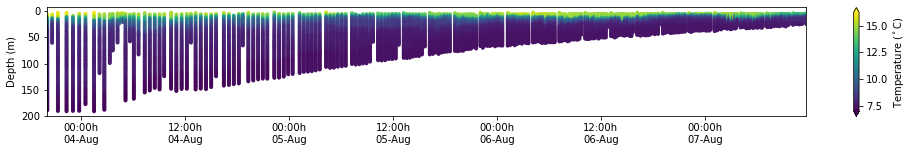

In [5]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(
    df.index,
    df["depth (m)"],
    s=15,
    c=df["temperature (Celsius)"],
    marker="o",
    edgecolor="none"
)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation="vertical", extend="both")
cbar.ax.set_ylabel("Temperature ($^\circ$C)")
ax.set_ylabel("Depth (m)");

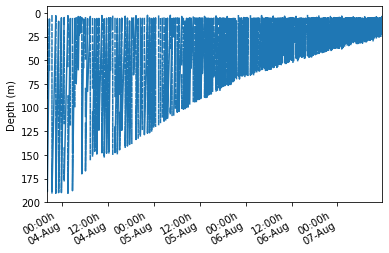

In [6]:
fig, ax = plt.subplots()

ax.plot(df.index, df["depth (m)"]);
ax.set_ylabel("Depth (m)");
ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
ax.xaxis.set_major_formatter(xfmt)
fig.autofmt_xdate()

In [7]:
df['distance']=df.apply(lambda row: geopy.distance.distance((47, -124.173),(row['latitude (degrees_north)'],row['longitude (degrees_east)'])).km, axis=1)

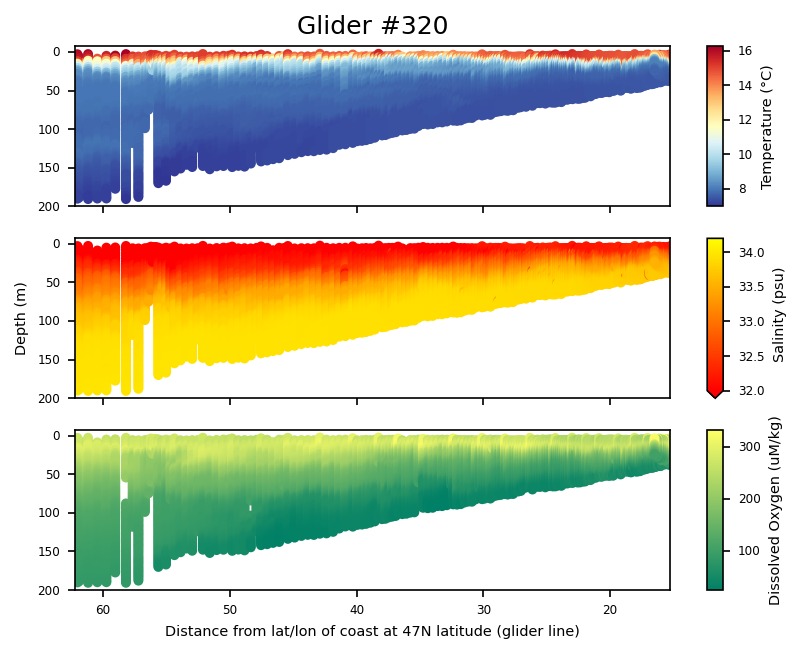

In [8]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df.distance, df['depth (m)'], c=df['temperature (Celsius)'], marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df.distance, df['depth (m)'], c=df['salinity (1)'], marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df.distance, df['depth (m)'], c=df['dissolved_oxygen (umol kg-1)'], marker=".", s=ms, cmap='summer') #vmin=0, vmax=300
cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (uM/kg)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax3.set_xlabel('Distance from lat/lon of coast at 47N latitude (glider line)',fontsize='x-small')
ax1.set_xlim(min(df.distance),max(df.distance));
ax1.invert_xaxis()

ax1.set_title('Glider #320')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

C:\Users\aBr\AppData\Local\Temp\ipykernel_22224\3347114576.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks_loc=cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));


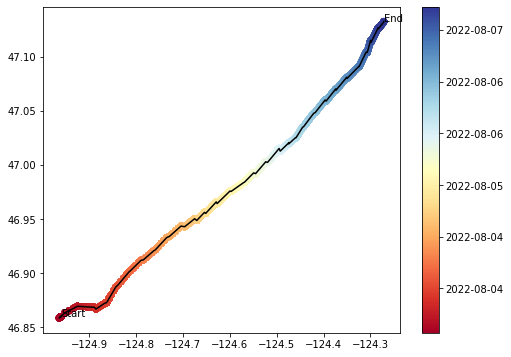

In [9]:
plt.figure(figsize=(8,6))

plt.plot(df['longitude (degrees_east)'], df['latitude (degrees_north)'], c='black')
plt.scatter(df['longitude (degrees_east)'], df['latitude (degrees_north)'], c=df.index, cmap='RdYlBu')

# Label Start/End Points
plt.text(df['longitude (degrees_east)'].iloc[0], df['latitude (degrees_north)'].iloc[0], 'Start')
plt.text(df['longitude (degrees_east)'].iloc[-1], df['latitude (degrees_north)'].iloc[-1], 'End')

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
ticks_loc=cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));
ax3.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))

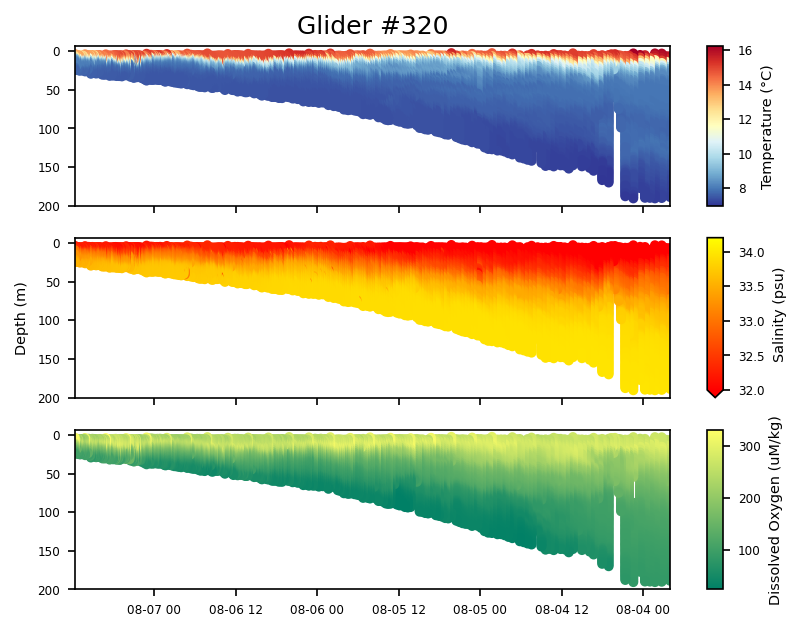

In [10]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df.index, df['depth (m)'], c=df['temperature (Celsius)'], marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df.index, df['depth (m)'], c=df['salinity (1)'], marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df.index, df['depth (m)'], c=df['dissolved_oxygen (umol kg-1)'], marker=".", s=ms, cmap='summer') #vmin=0, vmax=300


cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (uM/kg)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax1.set_xlim(min(df.index),max(df.index));
ax1.invert_xaxis()

ax1.set_title('Glider #320')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

C:\Users\aBr\AppData\Local\Temp\ipykernel_22224\2029585519.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));


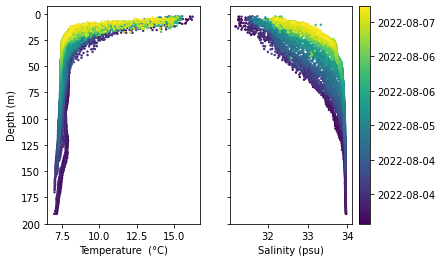

In [11]:
# Temperature Salinity Profile with Date
fig,(ax1,ax2) = plt.subplots(1, 2, sharey=True)
dx = ax1.scatter(df['temperature (Celsius)'],  df['depth (m)'], c=df.index, s=2)
dx1 = ax2.scatter(df['salinity (1)'],  df['depth (m)'], c=df.index, s=2)
ax1.invert_yaxis()

ax1.set_xlabel('Temperature  (°C)')
ax2.set_xlabel('Salinity (psu)')
ax1.set_ylabel('Depth (m)');

cb =fig.colorbar(dx1,ax=ax2)
cb.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

In [12]:
Sal = np.arange(31,34.25,.5)
#31,34.5,
#3,17
Temp = np.arange(6.5, 16, 3)
X, Y = np.meshgrid(Sal, Temp)

In [13]:
import seawater
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

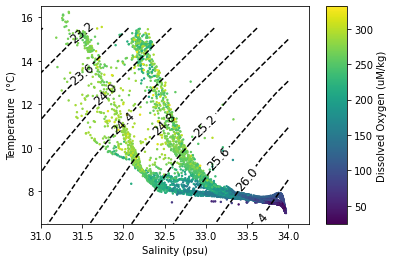

In [14]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(X,Y,Z, linestyles='dashed', colors='k',levels=np.arange(22,27.4,.4))
plt.clabel(CS, fontsize=12, inline=1, fmt='%.1f') # Label every second level
 
sc1 =ax1.scatter(df['salinity (1)'],df['temperature (Celsius)'], c=df['dissolved_oxygen (umol kg-1)'], s=2)
 
ax1.set_xlabel('Salinity (psu)')
ax1.set_ylabel('Temperature  (°C)')
ax1.set_xlim(31,34.25)
ax1.set_ylim(6.5,16.5)

ax1.margins(x=0)

cb1 = plt.colorbar(sc1, ax=ax1, aspect=10, label='Dissolved Oxygen (uM/kg)')
plt.rcParams['axes.xmargin'] = 0

plt.show()

In [15]:
spice=gsw.spiciness0(X,Y)

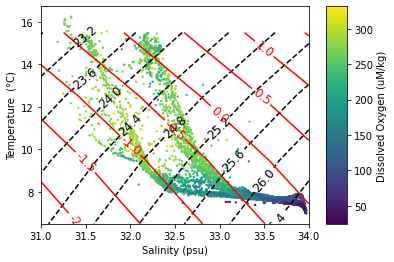

In [16]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

CS = plt.contour(X,Y,Z, linestyles='dashed', colors='k',levels=np.arange(22,27.4,.4))
CS2 = plt.contour(X,Y,spice, linestyles='-', colors='red')

plt.clabel(CS, fontsize=12, inline=1, fmt='%.1f') # Label every second level
plt.clabel(CS2, fontsize=12, inline=1, fmt='%.1f') # Label every second level

sc1 =ax1.scatter(df['salinity (1)'],df['temperature (Celsius)'], c=df['dissolved_oxygen (umol kg-1)'], s=2)
ax1.set_xlabel('Salinity (psu)')
ax1.set_ylabel('Temperature  (°C)')
cb1 = plt.colorbar(sc1, ax=ax1, aspect=10, label='Dissolved Oxygen (uM/kg)')
plt.show()

In [17]:
df1 = df[['distance','depth (m)','density (kg m-3)']]

In [18]:
df1['density (kg m-3)']= round(df1['density (kg m-3)']-1000,1)

C:\Users\aBr\AppData\Local\Temp\ipykernel_22224\758632020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['density (kg m-3)']= round(df1['density (kg m-3)']-1000,1)


In [19]:
df2 = df1[df1['density (kg m-3)']==26]
df2 = df2.reset_index()
df2 = df2.drop("density (kg m-3)",axis =1)
df2 = df2.drop("time (UTC)",axis =1)

In [20]:
df3 = df1[df1['density (kg m-3)']==26.5]
df3 = df3.reset_index()
df3 = df3.drop("density (kg m-3)",axis =1)
df3 = df3.drop("time (UTC)",axis =1)

In [21]:
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(df2['depth (m)'], sigma=2)
ysmoothed1 = gaussian_filter1d(df3['depth (m)'], sigma=2)

Text(0, 0.5, 'Depth')

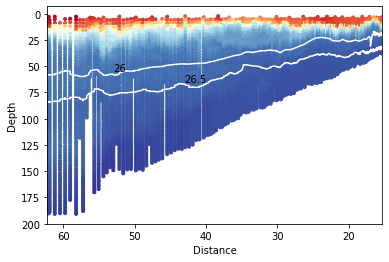

In [22]:
plt.scatter(df.distance, df['depth (m)'], c=df['temperature (Celsius)'], marker=".", cmap='RdYlBu_r')
plt.plot(df2['distance'],ysmoothed,color ='white')
plt.plot(df3['distance'],ysmoothed1,color ='white')

#plt.clabel(ax2, inline=True, fmt='%1.1f', fontsize=12) # label␣
plt.text(53,55,'26')
plt.text(43,65,'26.5') 
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("Distance")
plt.ylabel("Depth")

In [23]:
from gliderpy.plotters import plot_track, plot_transect

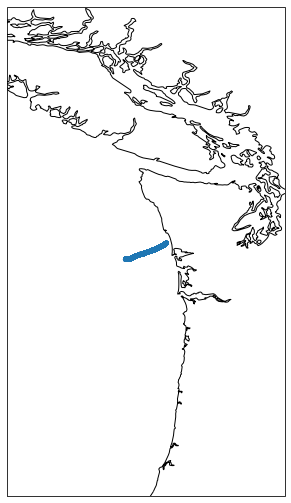

In [24]:
#!pip install gliderpy
fig, ax = plot_track(df)

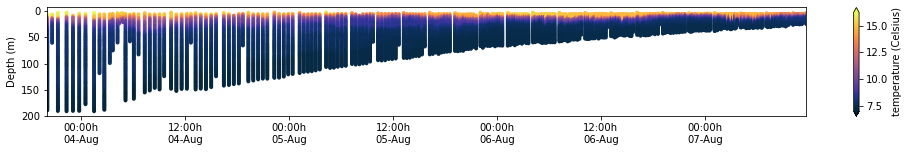

In [25]:
import palettable
#!pip install palettable
from palettable.cmocean.sequential import Thermal_20
from palettable.cmocean.sequential import Haline_20
fig, ax = plot_transect(df, "temperature (Celsius)", cmap=Thermal_20.mpl_colormap)

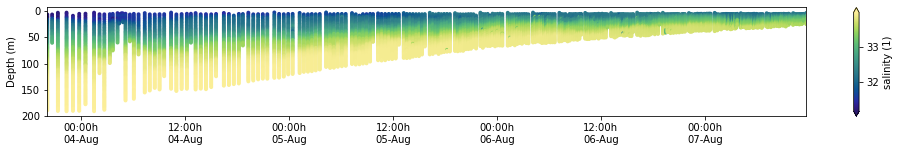

In [26]:
fig, ax = plot_transect(df, "salinity (1)", cmap=Haline_20.mpl_colormap)

In [27]:
def datetime2ytd(time):
    """" Return time in YTD format from datetime format."""
    return  (time - np.datetime64('2019-01-01'))/np.timedelta64(1, 'D')